# List of Content
A. Import Libraries & Load Data

B. Data Preparation

C. The Baseline Model

D. Results

E. Important features

# A. Import Libraries and Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

from sklearn import tree
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, brier_score_loss, log_loss


In [2]:
# Loading Data
raw_data = pd.read_csv("data_new.csv")
raw_data.head()

,Unnamed: 0,Hospital Mortality,Age,Gender,Uncomplicated Hypertension,Complicated Hypertension,Uncomplicated Diabetes,Complicated Diabetes,Malignancy,Hematologic Disease,...,Mean WBC,Max BUN,Min BUN,Mean BUN,Max Creatinine,Min Creatinine,Mean Creatinine,Max Hemoglobin,Min Hemoglobin,Mean Hemoglobin
0,0,0,77,M,0,0,0,0,0,0,...,17.26,53.0,41.0,44.75,3.2,2.4,2.65,12.8,7.8,10.04
1,1,1,42,M,1,0,0,0,0,0,...,10.60,17.0,16.0,16.50,1.4,1.2,1.30,15.4,12.9,14.10
2,2,1,72,M,1,0,0,0,0,0,...,8.10,39.0,28.0,33.50,1.7,1.3,1.50,13.3,7.8,10.23
3,9,1,72,M,1,0,0,0,1,1,...,6.90,13.0,11.0,12.00,0.9,0.7,0.80,10.6,10.6,10.60
4,13,0,76,M,0,0,0,0,0,0,...,18.20,55.0,42.0,48.50,2.6,1.8,2.20,12.5,12.5,12.50


In [3]:
raw_data['Hospital Mortality'].value_counts()

0    10331
1     2158
Name: Hospital Mortality, dtype: int64

In [4]:
# Convert Gender from Str to Numeric
raw_data['Gender'] = pd.get_dummies(raw_data['Gender'], drop_first = True)

In [5]:
raw_data.columns

Index(['Unnamed: 0', 'Hospital Mortality', 'Age', 'Gender',
       'Uncomplicated Hypertension', 'Complicated Hypertension',
       'Uncomplicated Diabetes', 'Complicated Diabetes', 'Malignancy',
       'Hematologic Disease', 'Metastasis', 'Peripheral Vascular Disease',
       'Hypothyroidism', 'Chronic Heart Failure', 'Stroke', 'Liver Disease',
       'SAPS II', 'SOFA', 'OASIS', 'Sepsis', 'Any Organ Failure',
       'Severe Respiratory Failure', 'Severe Coagulation Failure',
       'Severe Liver Failure', 'Severe Cardiovascular Failure',
       'Severe Central Nervous System Failure', 'Severe Renal Failure',
       'Respiratory Dysfunction', 'Cardiovascular Dysfunction',
       'Renal Dysfunction', 'Hematologic Dysfunction', 'Metabolic Dysfunction',
       'Neurologic Dysfunction', 'Max Heart Rate', 'Min Heart Rate',
       'Mean Heart Rate', 'Max MAP', 'Min MAP', 'Mean MAP',
       'Max Systolic Pressure', 'Min Systolic Pressure',
       'Mean Systolic Pressure', 'Max Diastolic Press

In [6]:
features = ['SAPS II', 'OASIS', 'Age', 'Gender',
    'Min Heart Rate', 'Mean Heart Rate', 'Mean MAP', 'Min Systolic Pressure',
    'Mean Systolic Pressure', 'Min Diastolic Pressure', 'Mean Diastolic Pressure', 'Max Temperature',
    'Mean Temperature', 'Max Lactate', 'Min Lactate', 'Min pH',
    'Mean pH', 'Min Glucose', 'Min BUN', 'Max Hemoglobin',
    'Min Hemoglobin', 'Uncomplicated Hypertension', 'Complicated Hypertension', 'Uncomplicated Diabetes',
    'Complicated Diabetes', 'Malignancy', 'Hematologic Disease', 'Peripheral Vascular Disease',
    'Hypothyroidism', 'Chronic Heart Failure', 'Liver Disease', 'Any Organ Failure',
    'Severe Respiratory Failure', 'Severe Cardiovascular Failure', 'Severe Central Nervous System Failure', 'Severe Renal Failure',
    'Respiratory Dysfunction', 'Renal Dysfunction', 'Metabolic Dysfunction', 'Neurologic Dysfunction']

In [7]:
X = raw_data[features]
y = raw_data['Hospital Mortality']

In [8]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [9]:
# Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

y_train_rus.value_counts()

0    1508
1    1508
Name: Hospital Mortality, dtype: int64

In [10]:
#Undersampling the test set
X_test_rus, y_test_rus= rus.fit_resample(X_test, y_test)
y_test_rus.value_counts()

0    650
1    650
Name: Hospital Mortality, dtype: int64

In [11]:
# Feature scaling
scaler = StandardScaler()
X_train_rus_scaled = scaler.fit_transform(X_train_rus)
X_test_rus_scaled = scaler.transform(X_test_rus)

# Checking the shape of the datasets
X_train_rus_scaled.shape, X_test_rus_scaled.shape, y_train_rus.shape, y_test_rus.shape

((3016, 40), (1300, 40), (3016,), (1300,))

In [12]:
# Checking class distribution in the target variable
class_distribution = y_train_rus.value_counts(normalize=True)
class_distribution

0    0.5
1    0.5
Name: Hospital Mortality, dtype: float64

# C. The baseline model - SVM baseline

In [13]:
# define SVM classifier (using default parameters)
svm_classifier = SVC(random_state=123, probability=True)

# fit SVM into a data
svm_classifier.fit(X_train_rus_scaled, y_train_rus)

SVC(probability=True, random_state=123)

In [14]:
# prediction using the best decision tree model obtained from GridSearchCV
y_pred = svm_classifier.predict(X_test_rus_scaled)
y_proba_rus = svm_classifier.predict_proba(X_test_rus_scaled)[:, 1]  # predicted probabilities for class 1

# D. Results

In [15]:
# No Sampling Classification Reports
print("Classification Report: Baseline Model - Under Sampling")
print(classification_report(y_test_rus, y_pred, target_names = ['Survival', 'Death']))

Classification Report: Baseline Model - Under Sampling
              precision    recall  f1-score   support

    Survival       0.76      0.77      0.77       650
       Death       0.77      0.76      0.77       650

    accuracy                           0.77      1300
   macro avg       0.77      0.77      0.77      1300
weighted avg       0.77      0.77      0.77      1300



In [16]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_rus, y_proba_rus)

# Calculate the AUC for SVM
auc_svm = auc(fpr_svm, tpr_svm)

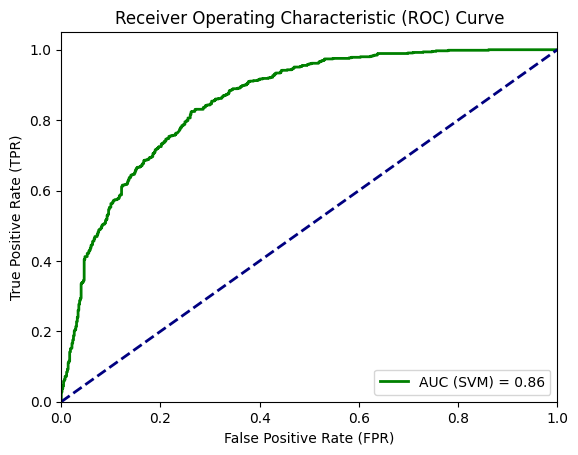

In [17]:
# Plot ROC curve for SVM
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'AUC (SVM) = {auc_svm:.2f}')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

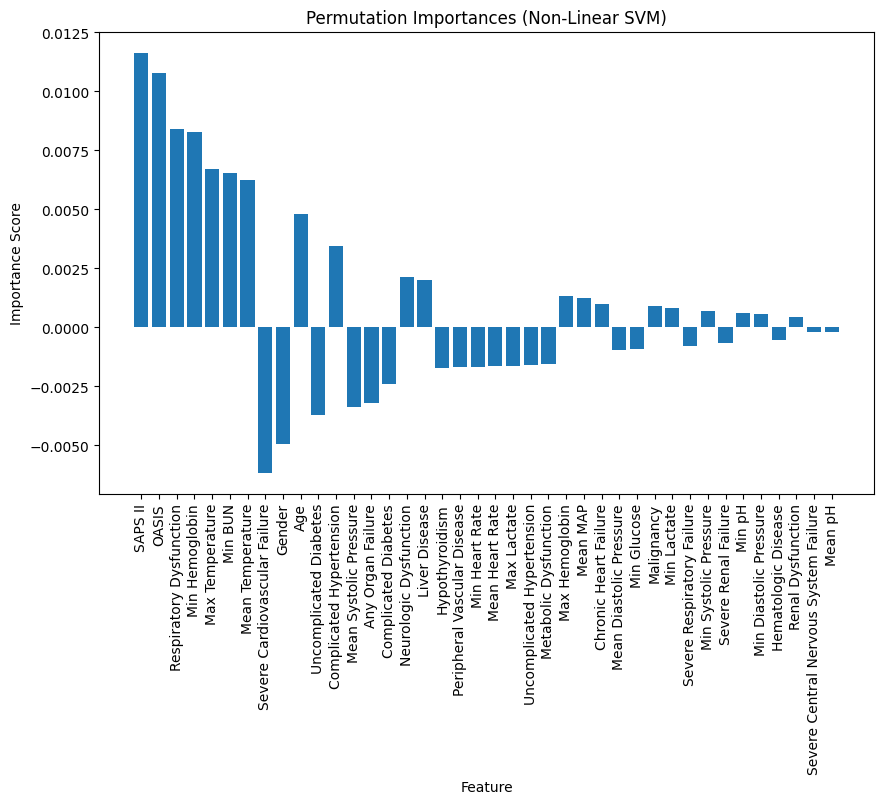

In [18]:
from sklearn.inspection import permutation_importance

# Calculate permutation importances
perm_importances = permutation_importance(svm_classifier, X_test_rus_scaled, y_test_rus, n_repeats=30, random_state=123)

# Get feature importances
feature_importances = perm_importances.importances_mean

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X_train_rus.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.reindex(feature_importance_df['Importance'].abs().sort_values(ascending=False).index)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance_df)), feature_importance_df['Importance'], align='center')
plt.xticks(range(len(feature_importance_df)), feature_importance_df['Feature'], rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Permutation Importances (Non-Linear SVM)')
plt.show()